In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.optimize import curve_fit 
from sklearn.metrics import r2_score

In [2]:
!python3 -V

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [3]:
df1 = pd.read_excel("refractancia.ods",usecols="A:B")
df1 = df1.dropna()
df1 = df1.rename(columns={"Degree(°)":"Degree","Intensity(lux)":"Intensity"})
df1

,Degree,Intensity
1,10,110.0
2,20,125.0
3,30,143.0
4,40,154.0
5,50,165.0
6,60,192.0
7,70,450.0
8,80,945.0


In [4]:
df2 = pd.read_excel("refractancia.ods",usecols="D:E")
df2 = df2.dropna()
df2 = df2.rename(columns={"Degree(°).1":"Degree","Intensity(lux).1":"Intensity"})
df2

,Degree,Intensity
1,10,35.0
2,20,45.0
3,30,41.0
4,40,35.0
5,50,17.0
6,60,18.0
7,70,99.0
8,80,387.0


In [5]:
df3 = pd.read_excel("refractancia.ods",usecols="G:H")
df3 = df3.dropna()
df3 = df3.rename(columns={"Degree(°).2":"Degree","Intensity(lux).2":"Intensity"})
df3

,Degree,Intensity
1,10,45.0
2,20,52.0
3,30,64.0
4,40,76.0
5,50,96.0
6,60,129.0
7,70,275.0
8,80,485.0


In [6]:
df4 = pd.read_excel("refractancia.ods",usecols="J:K")
df4 = df4.dropna()
df4 = df4.rename(columns={"Degree(°).3":"Degree","Intensity(lux).3":"Intensity"})
df4

,Degree,Intensity
1,10,38.0
2,20,38.0
3,30,50.0
4,40,54.0
5,50,63.0
6,60,88.0
7,70,187.0
8,80,275.0


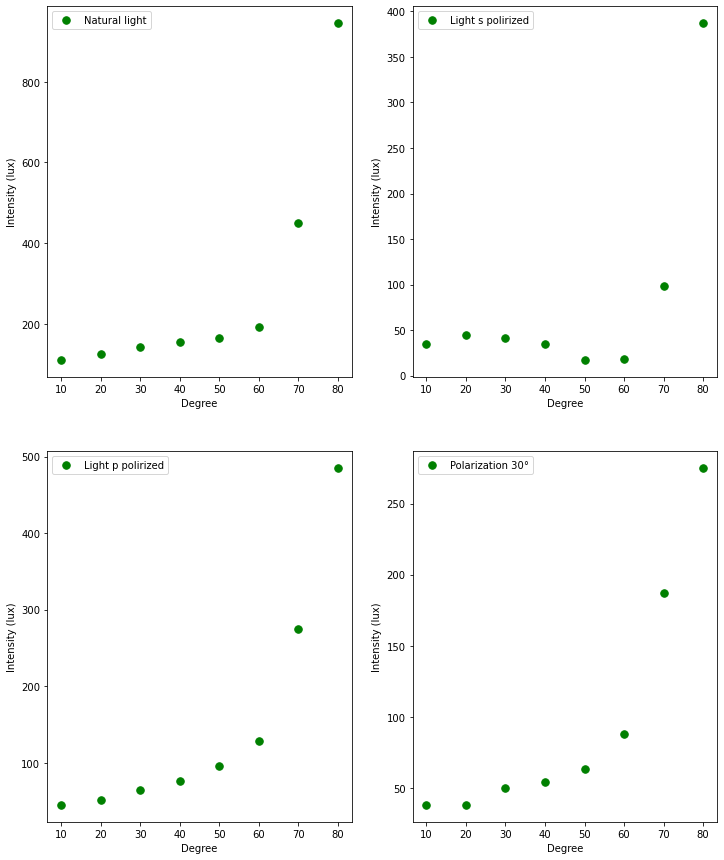

In [7]:
df_list = [df1,df2,df3,df4]
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,15))
leg = [["Natural light"],["Light s polirized"],["Light p polirized"],["Polarization 30°"]]
count = 0
for r in range(2):
    for c in range(2):
        df_list[count].plot(ax=axes[r,c],x="Degree",y="Intensity",style=".",markersize=15
                            ,color="Green",ylabel="Intensity (lux)").legend(leg[count])
        count+=1
plt.savefig("data_int_deg.png",dpi=800)

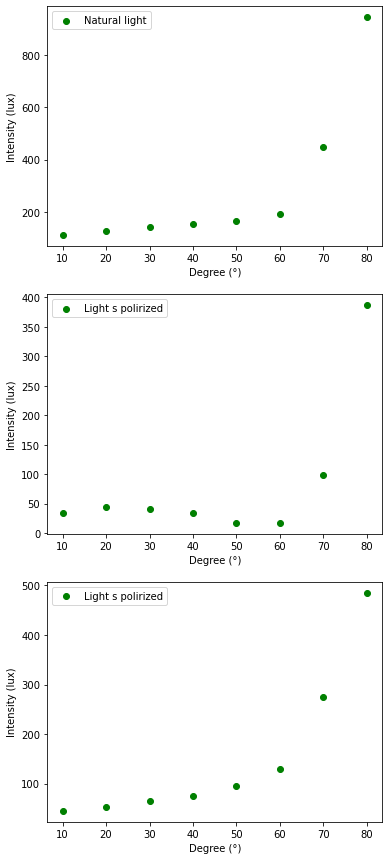

In [8]:
plt.subplots(nrows=3,ncols=1,figsize=(6,15))
plt.subplot(311)
plt.xlabel("Degree (°)")
plt.ylabel("Intensity (lux)")
plt.scatter(df1.Degree,df1.Intensity,color='green',label="Natural light")
plt.legend()
plt.subplot(312)
plt.scatter(df2.Degree,df2.Intensity,color='green',label="Light s polirized")
plt.xlabel("Degree (°)")
plt.ylabel("Intensity (lux)")
plt.legend()
plt.subplot(313)
plt.scatter(df3.Degree,df3.Intensity,color='green',label="Light s polirized")
plt.xlabel("Degree (°)")
plt.ylabel("Intensity (lux)")
plt.legend()
plt.savefig("data_int_deg_2.png",dpi=600,bbox_inches="tight")
plt.show()

In [9]:
def r_orth(x,n_t,A):
    n_i=1
    theta_t = np.arcsin(n_i*np.sin(x*np.pi/180)/n_t)
    r_orth = A*(n_i*np.cos(x*np.pi/180)-n_t*np.cos(theta_t))/(n_i*np.cos(x*np.pi/180)+n_t*np.cos(theta_t))
    return r_orth**2

In [10]:
def r_parall(x,n_t,B):
    n_i=1
    theta_t = np.arcsin(n_i*np.sin(x*np.pi/180)/n_t)
    r_parall = B*(n_t*np.cos(x*np.pi/180)-n_i*np.cos(theta_t))/(n_t*np.cos(x*np.pi/180)+n_i*np.cos(theta_t))
    return r_parall**2

In [11]:
params1, covar1 = curve_fit(r_orth, df1["Degree"].astype(np.float64), df1["Intensity"].astype(np.float64),method="trf")
params2, covar2 = curve_fit(r_parall, df2["Degree"].astype(np.float64), df2["Intensity"].astype(np.float64),method="trf")
params3, covar3 = curve_fit(r_orth, df3["Degree"].astype(np.float64), df3["Intensity"].astype(np.float64),method="trf")
params4, covar4 = curve_fit(r_orth, df4["Degree"].astype(np.float64), df4["Intensity"].astype(np.float64),method="trf")

params = [params1,params2,params3,params4]
covars = [np.diag(covar1),np.diag(covar2),np.diag(covar3),np.diag(covar4)]
std = np.sqrt(covars)

print("Parameters:\n",params,"\n\n","std:\n",std)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)


Parameters:
 [array([ 1.41643204, 42.89029948]), array([ 1.42485374, 40.42790395]), array([ 1.4894144 , 30.09226058]), array([ 1.6691375 , 21.61053601])] 

 std:
 [[0.08201355 2.57989535]
 [0.05400435 0.82373135]
 [0.04361182 0.81063938]
 [0.08146214 0.78463749]]


In [12]:
theta_i = np.linspace(0,90,100)
func1 = r_orth(theta_i,params1[0],params1[1])/r_orth(90,params1[0],params1[1])
func2 = r_parall(theta_i,params2[0],params2[1])/r_parall(90,params2[0],params2[1])
func3 = r_orth(theta_i,params3[0],params3[1])/r_orth(90,params3[0],params3[1])
func4 = r_orth(theta_i,params4[0],params4[1])/r_orth(90,params4[0],params4[1])
df = pd.DataFrame(data = {"theta_i":theta_i, "r_orth1":func1,"r_parall2":func2,"r_orth3":func3,"r_orth4":func4})
df.head(50)

,theta_i,r_orth1,r_parall2,r_orth3,r_orth4
0,0.000000,0.029699,0.030698,0.038651,0.062848
1,0.909091,0.029709,0.030687,0.038664,0.062867
2,1.818182,0.029741,0.030654,0.038703,0.062923
3,2.727273,0.029794,0.030600,0.038769,0.063018
4,3.636364,0.029868,0.030524,0.038861,0.063152
5,4.545455,0.029964,0.030427,0.038979,0.063323
6,5.454545,0.030081,0.030307,0.039124,0.063534
7,6.363636,0.030221,0.030166,0.039297,0.063784
8,7.272727,0.030383,0.030003,0.039497,0.064073
9,8.181818,0.030567,0.029818,0.039724,0.064402


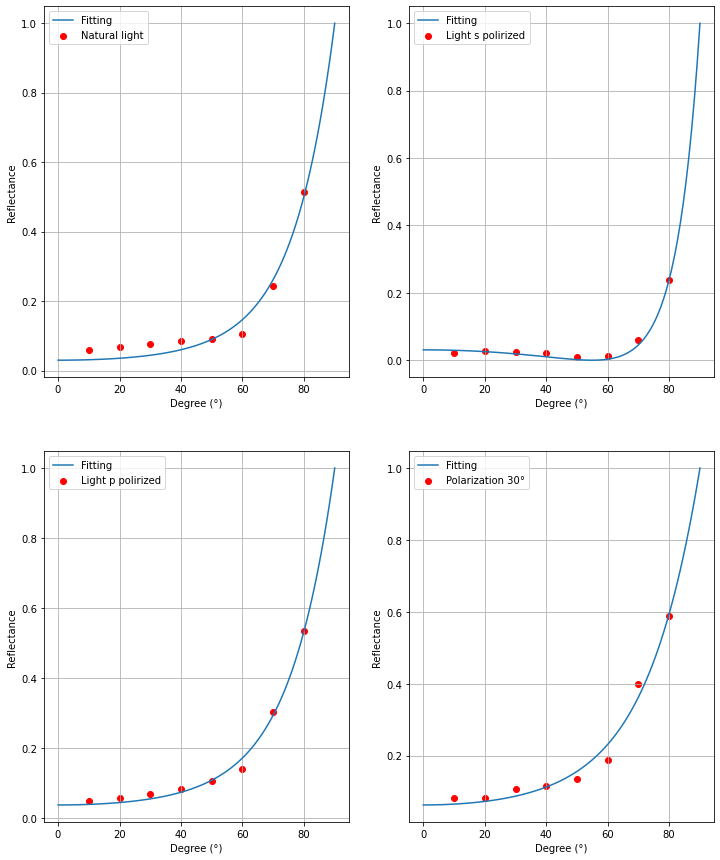

In [13]:
plt.subplots(nrows=2,ncols=2,figsize=(12,15))
plt.subplot(221)
plt.scatter(np.array(df1["Degree"]),np.array(df1["Intensity"])/r_orth(90,params1[0],params1[1]),color="red",label="Natural light")
plt.plot(np.array(df["theta_i"]),np.array(df["r_orth1"]),label="Fitting")
plt.xlabel("Degree (°)")
plt.ylabel("Reflectance")
plt.legend()
plt.grid()
plt.subplot(222)
plt.scatter(np.array(df2["Degree"]),np.array(df2["Intensity"])/r_parall(90,params2[0],params2[1]),color="red",label="Light s polirized")
plt.plot(np.array(df["theta_i"]),np.array(df["r_parall2"]),label="Fitting")
plt.xlabel("Degree (°)")
plt.ylabel("Reflectance")
plt.legend()
plt.grid()
plt.subplot(223)
plt.scatter(np.array(df3["Degree"]),np.array(df3["Intensity"])/r_orth(90,params3[0],params3[1]),color="red",label="Light p polirized")
plt.plot(np.array(df["theta_i"]),np.array(df["r_orth3"]),label="Fitting")
plt.xlabel("Degree (°)")
plt.ylabel("Reflectance")
plt.legend()
plt.grid()
plt.subplot(224)
plt.scatter(np.array(df4["Degree"]),np.array(df4["Intensity"])/r_orth(90,params4[0],params4[1]),color="red",label="Polarization 30°")
plt.plot(np.array(df["theta_i"]),np.array(df["r_orth4"]),label="Fitting")
plt.xlabel("Degree (°)")
plt.ylabel("Reflectance")
plt.legend()
plt.grid()
plt.savefig("fit_int_deg.png",dpi=800)
plt.show()

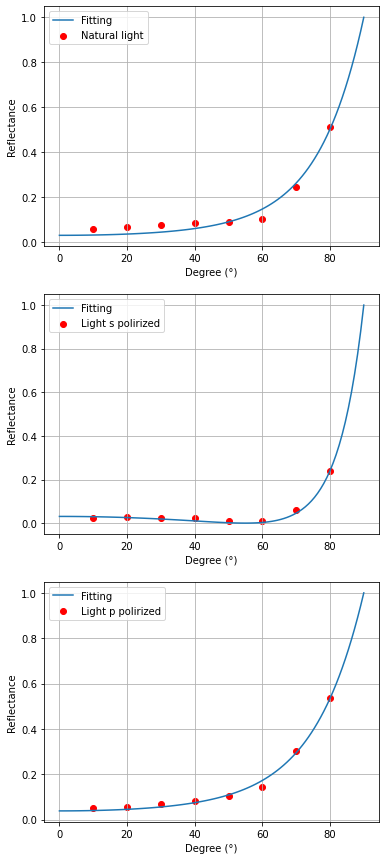

In [14]:
plt.subplots(nrows=3,ncols=1,figsize=(6,15))
plt.subplot(311)
plt.scatter(df1.Degree,df1.Intensity/params1[1]**2,color="red",label="Natural light")
plt.plot(df.theta_i,df.r_orth1,label="Fitting")
plt.xlabel("Degree (°)")
plt.ylabel("Reflectance")
plt.legend()
plt.grid()
plt.subplot(312)
plt.scatter(df2.Degree,df2.Intensity/params2[1]**2,color="red",label="Light s polirized")
plt.plot(df.theta_i,df.r_parall2,label="Fitting")
plt.xlabel("Degree (°)")
plt.ylabel("Reflectance")
plt.legend()
plt.grid()
plt.subplot(313)
plt.scatter(df3.Degree,df3.Intensity/params3[1]**2,color="red",label="Light p polirized")
plt.plot(df.theta_i,df.r_orth3,label="Fitting")
plt.xlabel("Degree (°)")
plt.ylabel("Reflectance")
plt.legend()
plt.grid()
plt.savefig("fit_int_deg_2.png",dpi=600,bbox_inches="tight")
plt.show()

In [15]:
r2scores = []
titles = ["r_orth1","r_parall2","r_orth3"]
for j in range(0,3):
    aux = []
    for i in range(1,9):
        aux.append(df.loc[df.theta_i==10*i,titles[j]].to_numpy())
    r2scores.append(r2_score(df_list[j].Intensity/params[j][1]**2,aux))
r2scores

[0.965859965514395, 0.9849608118010359, 0.9923414157966929]

In [16]:
n_t_list = []
n_t_list_std = []
for i in range(4):
    n_t_list.append(params[i][0])
    n_t_list_std.append(std[i][0])

print(n_t_list)
print(n_t_list_std)

n_t_exp = np.mean(n_t_list)
n_t_std = np.std(n_t_list)
print("Index refraction: {:.4f}\nstd: {:.4f}".format(n_t_exp,n_t_std))

[1.4164320397692562, 1.4248537381812951, 1.489414395749186, 1.6691374975659923]
[0.0820135458167945, 0.05400434668030825, 0.04361182113060135, 0.08146214340194753]
Index refraction: 1.5000
std: 0.1017


In [17]:
# mean and variation with each std of n_t's
a=0
b=0
for i in range(4):
    a += n_t_list[i]/n_t_list_std[i]**2
    b += 1/n_t_list_std[i]**2

n_t_exp = a/b
n_t_std = 1/np.sqrt(b)
print("Index refraction: {:.4f}\nstd: {:.4f}".format(n_t_exp,n_t_std))

Index refraction: 1.4844
std: 0.0293


In [18]:
data4 = pd.read_excel("refractancia.ods",sheet_name="Sheet2",usecols="A:B")
data4 = data4.rename(columns={"Degree(°)":"Degree", "Intensity(lux)":"Intensity"})
data4

,Degree,Intensity
0,0,10
1,5,10
2,10,10
3,15,10
4,20,9
...,...,...
68,340,8
69,345,8
70,350,9
71,355,9


In [19]:
index = np.linspace(1,71,36)
data4 = data4.drop(index=index)
data4

,Degree,Intensity
0,0,10
2,10,10
4,20,9
6,30,8
8,40,6
10,50,3
12,60,2
14,70,1
16,80,1
18,90,1


In [20]:
def mallus(theta,I_0):
    return I_0*np.cos(theta*np.pi/180)**2 #in rads

In [21]:
params, covars = curve_fit(mallus, data4.Degree, data4.Intensity, method="trf")
print(params,covars)
fit = mallus(data4.Degree,params[0])
print("R^2 score: ",r2_score(data4.Intensity,fit))

[10.31722252] [[0.064265]]
R^2 score:  0.9308438654126394


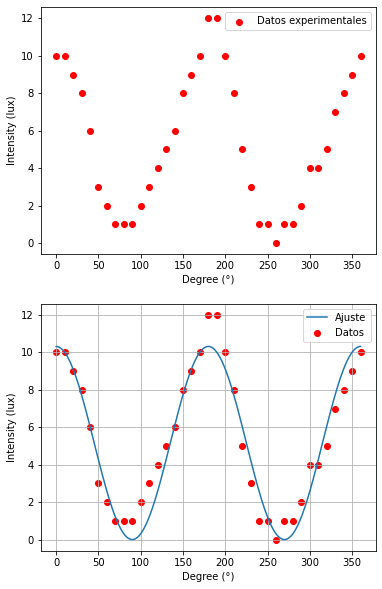

In [22]:
x = np.linspace(0,360,361)
fit2 = mallus(x,params[0])

plt.subplots(nrows=2,ncols=1,figsize=(6,10))
plt.subplot(211)
plt.scatter(data4.Degree,data4.Intensity,color="red",label="Datos experimentales")
plt.xlabel("Degree (°)")
plt.ylabel("Intensity (lux)")
plt.legend()
plt.subplot(212)
plt.plot(x,fit2,label="Ajuste")
plt.scatter(data4.Degree,data4.Intensity,color="red",label="Datos")
plt.xlabel("Degree (°)")
plt.ylabel("Intensity (lux)")
plt.grid()
plt.legend()
plt.savefig("data-fit_int_deg_3.png",dpi=800,bbox_inches="tight")
plt.show()